<a href="https://colab.research.google.com/github/PinakDivecha/1101608_1dconv_reg/blob/master/NLP_Assignemnt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import csv
import urllib.request as urllib2
# !pip install urllib2 
# import urllib2

import pandas as pd
 
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
response = urllib2.urlopen(url)

df = pd.read_csv(response)
df = df.dropna()

In [2]:
# Question 1
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


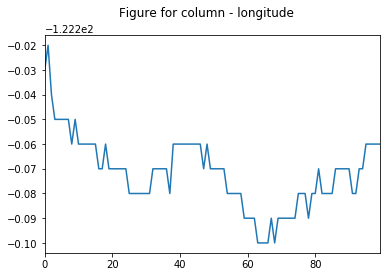

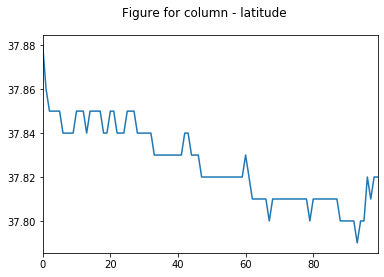

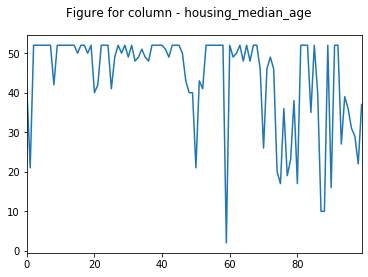

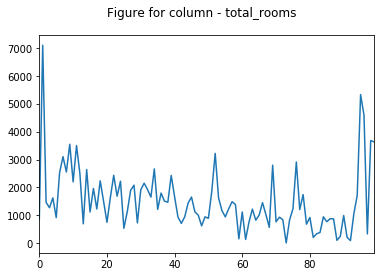

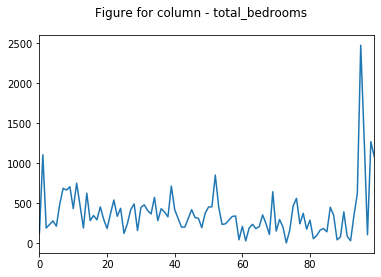

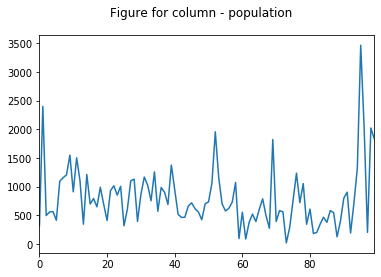

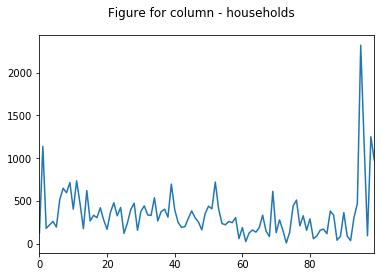

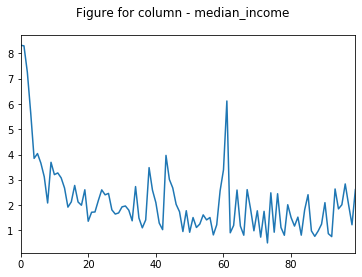

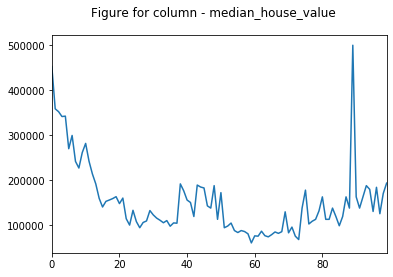

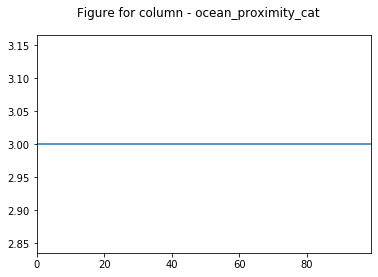

In [3]:
# Converting the categorical into numerical
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

# Save the numerical value for ocean_proximity column into new column name ocean_proximity_cat
df["ocean_proximity_cat"] = df["ocean_proximity"].cat.codes

# Importing the required library
import matplotlib.pyplot as plt

# For loop for displaying each column graph.
for i in df.columns:
    if i != 'ocean_proximity': 
      plt.figure()
      plt.suptitle('Figure for column - '+i)
      df[i][:100].plot(subplots=True)
# Question 2 output

<Figure size 432x288 with 0 Axes>

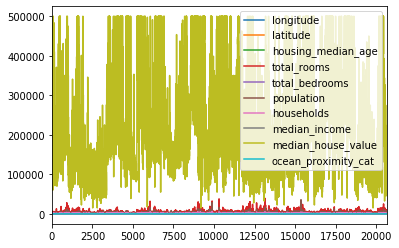

In [4]:
plt.figure()

df.plot()

In [0]:
import torch
from torch.nn import Conv1d
from torch.nn import Dropout

from torch.nn import MaxPool1d
from torch.nn import AvgPool1d


from torch.nn import  Flatten

from torch.nn import Linear

from torch.nn.functional import relu

from torch.utils.data import DataLoader, TensorDataset

In [0]:
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs
    # print("Output size: ",outputs)
    
    self.input_layer  = Conv1d(inputs, batch_size, 1)

    self.max_pooling_layer = MaxPool1d(1)
    # self.max_pooling_layer = AvgPool1d(1)
      
    self.conv_layer = Conv1d(batch_size, 128,1) #Conv1D

    
    # self.max_pooling_layer1 = MaxPool1d(1)
    # self.max_pooling_layer1 = AvgPool1d(1)
    
    # self.conv_layer1 = Conv1d(128, 128,1) #Conv1D

    # self.max_pooling_layer2 = MaxPool1d(1)

    # self.conv_layer2 = Conv1d(128, 128,1) #Conv1D

    # self.max_pooling_layer3 = MaxPool1d(1)

    # self.conv_layer3 = Conv1d(128, 128,1) #Conv1D
    
    self.flatten_layer = Flatten()

    self.linear_layer = Linear(128, 64)

    self.output_layer = Linear(64, outputs)

  def feed(self,input):
    input = input.reshape((self.batch_size, self.inputs, 1))
    # print("Input size ", input.shape)
    output = relu(self.input_layer(input))

    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))
    
    # print("One ", output.shape)
    # output = self.max_pooling_layer1(output)
    # print("two ",output.shape)
    # output = relu(self.conv_layer1(output))

    # output = self.max_pooling_layer2(output)
    # # print("two ",output.shape)
    # output = relu(self.conv_layer2(output))

    # output = self.max_pooling_layer3(output)
    # # print("two ",output.shape)
    # output = relu(self.conv_layer3(output))

    output = self.flatten_layer(output)
    # print("three ",output.shape)

    output = self.linear_layer(output)

    # output = self.dropout1(output)

    output = self.output_layer(output)

    return output

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
    
import numpy as np

In [8]:
# df_x = df.loc[:, df.columns != 'median_house_value']
df_x = df.loc[:,'longitude':'median_income']
df_y = df['median_house_value']

print(df_x.columns)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=2003)
x_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

x_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

print(x_train_np.shape, y_train_np.shape, x_test_np.shape, y_test_np.shape)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
(14303, 8) (14303,) (6130, 8) (6130,)


In [9]:
batch_size = 64

model = CnnRegressor(batch_size, df_x.shape[1],1)

model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [10]:
from torch.optim import SGD
from torch.optim import Rprop, Adam


from torch.nn import L1Loss, MSELoss
# from torch.nn import L1Loss
!pip install pytorch.ignite

from ignite.contrib.metrics.regression.r2_score import R2Score

     |████████████████████████████████| 112kB 3.5MB/s 


In [0]:
def model_loss(model, dataa, train = False, optimizer = None):
  # performance = L1Loss()
  performance = MSELoss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataa):
    # print("This is the shape ",input.shape)
    prediction = model.feed(input)

    loss = performance(prediction, output)

    score_metric.update([prediction, output])
    score = score_metric.compute()

    if (train):
      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

    avg_loss += loss.item()
    avg_score += score
    count += 1
 
  return avg_loss / count, avg_score / count

In [12]:
epochs = 400  

optimizer = Adam(model.parameters(),lr=0.001)

inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle = True, drop_last = True)
xx = 0
yy = 0

import time
start = time.time()

for epoch in range(epochs):
  avg_loss, avg_2_score = model_loss(model, loader, train = True, optimizer = optimizer)

end = time.time()
print(end - start)

print("Epoch ",str(epoch+1)," Loss", str(avg_loss), " R2Score",str(avg_2_score))

298.7499735355377
Epoch  400  Loss 3813185699.013453  R2Score 0.7118709930996063


In [21]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()

tensor = TensorDataset(inputs, outputs)

loader = DataLoader(tensor,batch_size, shuffle=True, drop_last=True)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
avg_loss, avg_r2_score = model_loss(model, loader)
end.record()

torch.cuda.synchronize()

print(start.elapsed_time(end))

print("Loss = " + str(avg_loss) + "\nR^2 Score = " + str(avg_r2_score))


124.92012786865234
Loss = 4354447354.610526
R^2 Score = 0.6860561520265891
